# Ensemble method
---
In this workbook, we will be trying out 3 different ensemble method with a baseline ensemble method and to check if there is an improvement in model. 

### Data loading & Processing

In [52]:
import pandas as pd
import numpy as np 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, precision_recall_curve
import joblib

In [53]:
train = pd.read_csv("traindata_rfe.csv")
test = pd.read_csv("testdata_rfe.csv")

/var/folders/ws/d095dcyd45q725d2bmjssqsm0000gn/T/ipykernel_29083/2738918831.py:1: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("traindata_rfe.csv")


In [54]:
X_train = train.drop(['transcript_id', 'gene_id', 'label'], axis=1)
y_train = train['label']
X_test = test.drop(['transcript_id', 'gene_id', 'label'], axis=1)
y_test = test['label']

In [55]:
y_train.value_counts()

label
0    93715
1    93715
Name: count, dtype: int64

In [56]:
y_test.value_counts()

label
0    22648
1     1184
Name: count, dtype: int64

In [57]:
X_train.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,244,125.913514,4.386989,6.650,126.0,3.440,1.843025,4.944365,3.302671,2.765244,2.906225,2.522168,1,4,16
1,261,107.889535,3.016599,3.000,108.0,2.660,1.689167,2.981182,1.237045,3.526528,1.466295,2.492530,6,2,10
2,316,98.947027,2.087146,3.780,99.5,1.910,1.311103,1.492577,0.893481,3.203816,0.800496,1.484341,12,0,2
3,332,97.836500,2.236520,2.635,97.5,2.135,2.459317,3.202963,1.393868,1.928009,0.741771,3.494937,2,6,3
4,368,121.954545,4.260253,5.660,122.0,4.160,2.743228,2.664643,1.753894,2.177236,1.341822,2.379045,3,9,12


In [58]:
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(X_train)
normalised_X_train = pd.DataFrame(d, columns=X_train.columns)
normalised_X_train.head()


,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.012869,0.774042,0.287885,0.463500,0.781312,0.201650,0.048485,0.280016,0.101848,0.226398,0.090561,0.146461,0.043478,0.235294,0.695652
1,0.013777,0.410623,0.157972,0.142480,0.423459,0.130156,0.043891,0.152029,0.033255,0.310842,0.042812,0.144293,0.260870,0.117647,0.434783
2,0.016714,0.230314,0.069860,0.211082,0.254473,0.061412,0.032605,0.054982,0.021846,0.275046,0.020733,0.070529,0.521739,0.000000,0.086957
3,0.017568,0.207922,0.084021,0.110378,0.214712,0.082035,0.066883,0.166488,0.038463,0.133529,0.018786,0.217634,0.086957,0.352941,0.130435
4,0.019491,0.694217,0.275871,0.376429,0.701789,0.267644,0.075359,0.131393,0.050418,0.161175,0.038684,0.135990,0.130435,0.529412,0.521739


In [59]:
normalised_X_train.describe()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
count,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000,187430.000000
mean,0.085326,0.508940,0.154020,0.305686,0.520414,0.132076,0.041002,0.174722,0.057859,0.295164,0.037428,0.147859,0.483273,0.496438,0.596488
std,0.072670,0.228647,0.075383,0.165956,0.227870,0.064208,0.020944,0.084652,0.027575,0.103189,0.021194,0.049804,0.313065,0.264055,0.294130
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.039141,0.261410,0.097079,0.163588,0.273051,0.085876,0.026905,0.116227,0.035821,0.219571,0.020538,0.112853,0.130435,0.294118,0.391304
50%,0.068938,0.595979,0.145802,0.284984,0.604371,0.122314,0.039776,0.157656,0.060753,0.291887,0.035751,0.143676,0.521739,0.529412,0.608696
75%,0.108453,0.682189,0.197189,0.415128,0.697689,0.165445,0.053684,0.218044,0.076794,0.365810,0.049810,0.177976,0.739130,0.647059,0.869565
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
d = scaler.fit_transform(X_test)
normalised_X_test = pd.DataFrame(d, columns=X_test.columns)
normalised_X_test.head()

,transcript_position,avg_central_mean,avg_1+flank_std,med_central_std,med_central_mean,med_1+flank_std,std_1-flank_std,std_1-flank_mean,std_central_std,std_central_mean,std_1+flank_std,std_1+flank_mean,seq_left,seq_center,seq_right
0,0.054772,0.689752,0.111903,0.727019,0.693878,0.107848,0.189319,0.254995,0.077564,0.365202,0.032594,0.026947,0.478261,1.000000,0.913043
1,0.058768,0.791245,0.128262,0.324048,0.795918,0.100253,0.087639,0.142416,0.062153,0.252199,0.044891,0.043219,0.130435,0.647059,0.869565
2,0.061236,0.778200,0.168967,0.438254,0.795918,0.157468,0.058464,0.219995,0.096518,0.290691,0.052945,0.067706,0.304348,0.176471,0.608696
3,0.070052,0.721716,0.187557,0.418756,0.714286,0.172658,0.144078,0.161922,0.131265,0.392006,0.053597,0.064235,0.130435,0.647059,0.869565
4,0.081335,0.708707,0.173422,0.592386,0.714286,0.151392,0.110263,0.233199,0.114632,0.424743,0.056727,0.021868,0.478261,1.000000,1.000000


## Ensemble model 
Trying to combine XGBoost and LSTM together 

In [10]:
import xgboost as xgb
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split

2023-11-02 08:14:57.457723: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [168]:
# load our 2 models 
# Load the trained model from the file
best_xgboost = joblib.load('best_xgboost.pkl')
best_lstm = joblib.load('best_lstm.pkl')

### Ensemble model 1: Stack XGBoost and LSTM with logistic regression 
Link of source: https://www.researchgate.net/publication/346120792_A_Host-Based_Anomaly_Detection_Framework_Using_XGBoost_and_LSTM_for_IoT_Devices/figures?lo=1

We would like to borrow the idea of stacking both models with logistic regression

In [101]:
# created a validation set 
X_train_sub, X_val, y_train_sub, y_val = train_test_split(normalised_X_train, y_train, test_size=0.2, random_state=42)

In [102]:
best_xgboost.fit(X_train_sub, y_train_sub)
best_lstm.fit(X_train_sub, y_train_sub) 

4686/4686 [==============================] - 63s 13ms/step - loss: 0.2309


In [103]:
xgboost_probs = best_xgboost.predict_proba(X_val)[:, 1]
lstm_probs = best_lstm.predict(X_val).ravel()

1172/1172 [==============================] - 9s 7ms/step


In [104]:
from sklearn.linear_model import LogisticRegression
stacked_features_val = np.column_stack((xgboost_probs, lstm_probs))
stacked_features_val

array([[1.6029675e-02, 3.5851453e-03],
       [9.3523353e-01, 8.5659981e-01],
       [9.3773782e-01, 9.8070264e-01],
       ...,
       [7.2111964e-01, 9.9414462e-01],
       [2.1766961e-02, 1.3625160e-07],
       [4.6063859e-02, 1.4447805e-02]], dtype=float32)

In [143]:
# the non tuned LG is not v good, so we are doing a tuning here 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameters and their values
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # Both these solvers support l1 and l2 penalty
}

log_reg = LogisticRegression()

# Use Randome Search 
grid_search = RandomizedSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(stacked_features_val, y_val)

# Print best parameters
print(grid_search.best_params_)


{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.01}


In [144]:
# 1. Retrieve the best estimator
best_log_reg = grid_search.best_estimator_

xgboost_new_probs = best_xgboost.predict_proba(normalised_X_test)[:, 1]
lstm_new_probs = best_lstm.predict(normalised_X_test).ravel()
stacked_new_features = np.column_stack((xgboost_new_probs, lstm_new_probs))

# 2. Make predictions using the best model
predictions = best_log_reg.predict(stacked_new_features)

745/745 [==============================] - 9s 9ms/step


In [151]:
final_predictions_class = (predictions > 0.5).astype(int) # define 0 or 1 class 

In [152]:
print(classification_report(y_test, final_predictions_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22648
           1       0.45      0.48      0.46      1184

    accuracy                           0.95     23832
   macro avg       0.71      0.72      0.72     23832
weighted avg       0.95      0.95      0.95     23832



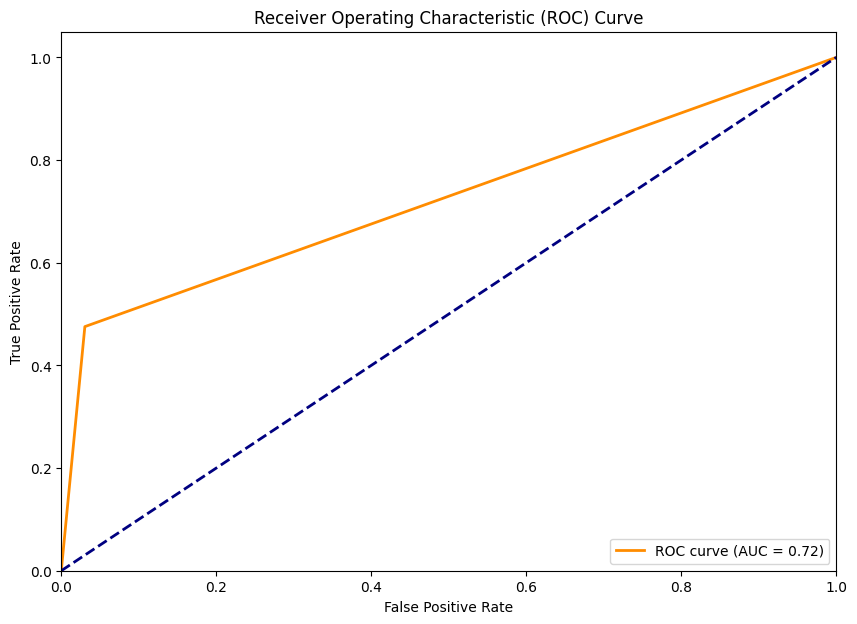

In [153]:
# ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

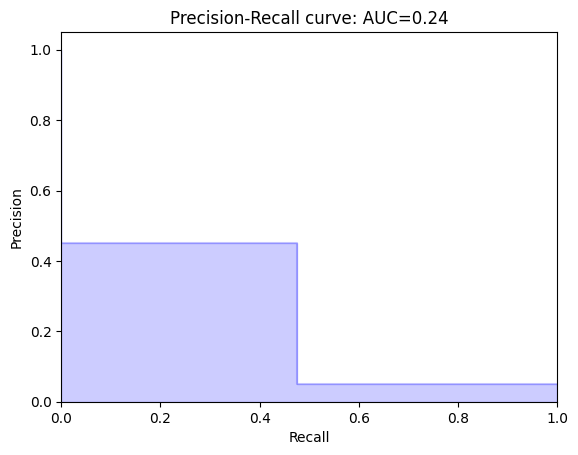

In [154]:
# Get predicted probabilities for the positive class (class 1)
# Calculate PR AUC
pr_auc = average_precision_score(y_test, predictions)

# Plot Precision-Recall curve (optional)
precision, recall, _ = precision_recall_curve(y_test, predictions)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()


The PR ROC curve does not look very good for this method. There seem to be a clear cut around 0.45 recall, which might be due to data imbalancing. 

### Ensemble model 2: using voting classifier 
One problem with voting classifier is that our LSTM sequential model is not a classifier, and XGBoost and LSTM returns different format of output (LSTM returns only prob of class 1, and XGBoost by default gives me nested array of both prob of class 0 and 1.) Hence, we used 2 wrapper class here to configure both model as classifier with same output format.

In [184]:
best_xgboost = joblib.load('best_xgboost.pkl')
best_lstm = joblib.load('best_lstm.pkl')

In [196]:
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
from sklearn.ensemble import VotingClassifier

class KerasClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model):
        self.model = model
        
    def fit(self, X, y, **kwargs):
        # This function assumes that you've already trained the model, so it does nothing.
        pass
    
    def predict(self, X, **kwargs):
        # Get probabilities and convert them to class labels
        probs = self.model.predict(X)
        return (probs > 0.5).astype(int).flatten()
    
    def predict_proba(self, X, **kwargs):
        # Return the probabilities from the model
        return self.model.predict(X)

# Wrap your LSTM model
wrapped_lstm = KerasClassifierWrapper(best_lstm)

class XGBoostWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, xgb_model):
        self.xgb_model = xgb_model

    def fit(self, X, y):
        self.xgb_model.fit(X, y)
        return self

    def predict(self, X):
        return self.xgb_model.predict(X)

    def predict_proba(self, X):
        # Predict probabilities and select only the probabilities for class 1
        return self.xgb_model.predict_proba(X)[:, 1].reshape(-1, 1)

best_xgboost_wrapped = XGBoostWrapper(best_xgboost)

# Create a list of base models
estimators = [('xgboost', best_xgboost_wrapped), ('lstm', wrapped_lstm)]

# VotingClassifier setup remains the same
voting_classifier = VotingClassifier(estimators, voting='soft')

voting_classifier.fit(normalised_X_train, y_train)


VotingClassifier(estimators=[('xgboost',
                              XGBoostWrapper(xgb_model=XGBClassifier(base_score=None,
                                                                     booster=None,
                                                                     callbacks=None,
                                                                     colsample_bylevel=None,
                                                                     colsample_bynode=None,
                                                                     colsample_bytree=0.7445107941187324,
                                                                     device=None,
                                                                     early_stopping_rounds=None,
                                                                     enable_categorical=False,
                                                                     eval_metric=None,
                                                                     feature_types=None,
                                                                     gamma=7.422940033575507,
                                                                     grow_policy=None,
                                                                     impor...
                                                                     max_cat_threshold=None,
                                                                     max_cat_to_onehot=None,
                                                                     max_delta_step=None,
                                                                     max_depth=8,
                                                                     max_leaves=None,
                                                                     min_child_weight=5,
                                                                     missing=nan,
                                                                     monotone_constraints=None,
                                                                     multi_strategy=None,
                                                                     n_estimators=180,
                                                                     n_jobs=None,
                                                                     num_parallel_tree=None,
                                                                     objective='reg:logistic', ...))),
                             ('lstm',
                              KerasClassifierWrapper(model=<keras.src.engine.sequential.Sequential object at 0x1456bd310>))],
                 voting='soft')

In [203]:
#joblib.dump(best_xgboost_wrapped, 'best_xgboost_wrapped.pkl')
#joblib.dump(wrapped_lstm, 'wrapped_lstm.pkl')
#joblib.dump(voting_classifier, 'ensemble_voting_model.pkl')

['ensemble_voting_model.pkl']

In [197]:
# Get the class probabilities from the VotingClassifier
probs = voting_classifier.predict_proba(normalised_X_test)

745/745 [==============================] - 3s 3ms/step


In [198]:
probs_class = (probs > 0.5).astype(int) # 0 or 1 class 

In [199]:
print(classification_report(y_test, probs_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22648
           1       0.48      0.46      0.47      1184

    accuracy                           0.95     23832
   macro avg       0.73      0.72      0.72     23832
weighted avg       0.95      0.95      0.95     23832



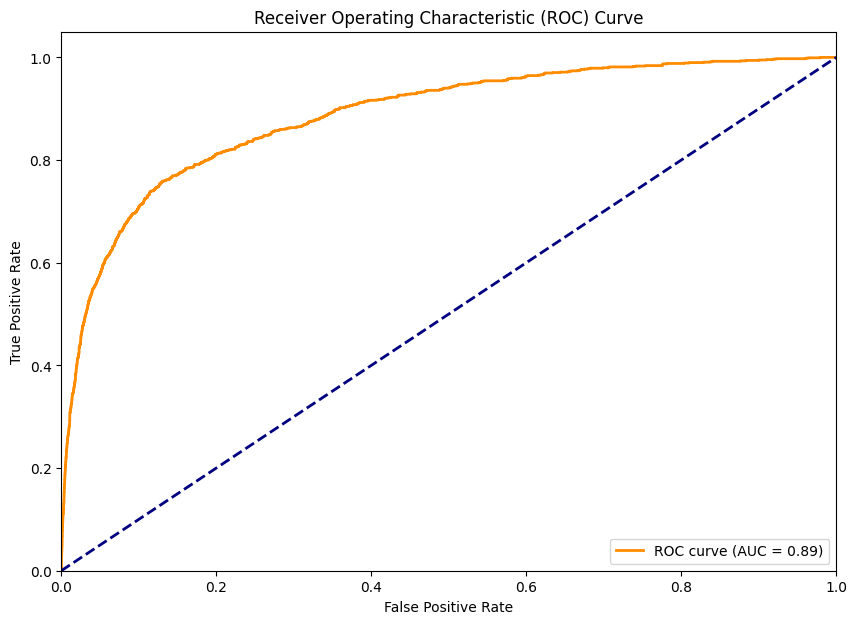

In [200]:
# ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

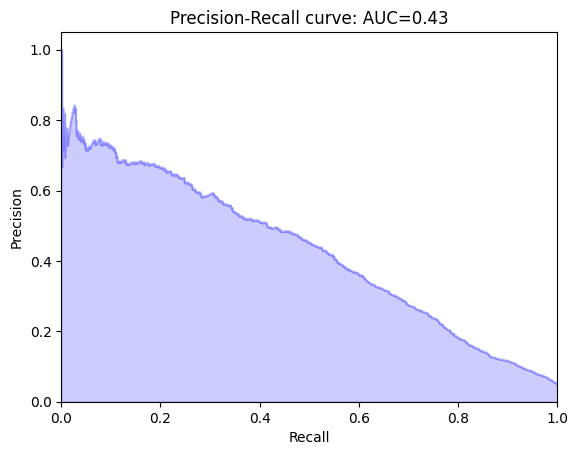

In [201]:
# Get predicted probabilities for the positive class (class 1)
# Calculate PR AUC
pr_auc = average_precision_score(y_test, probs)

# Plot Precision-Recall curve (optional)
precision, recall, _ = precision_recall_curve(y_test, probs)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()


### Ensemble Model 3: Using MAE to ensemble the 2 models 
Source: https://github.com/Hupperich-Manuel/LSTM-XGBoost-Hybrid-Forecasting#hybrid_approach

In [170]:
best_xgboost = joblib.load('best_xgboost.pkl')
best_lstm = joblib.load('best_lstm.pkl')

In [171]:
pred_xgb = best_xgboost.predict_proba(normalised_X_test)[:, 1]
pred_lstm = best_lstm.predict(normalised_X_test).ravel()
true_labels = y_test 

745/745 [==============================] - 9s 10ms/step


In [172]:
mae_lstm = np.mean(np.abs(pred_lstm - true_labels))
mae_xgb = np.mean(np.abs(pred_xgb - true_labels))

# Calculate the ensemble weights
weight_xgb = 1 - mae_xgb / (mae_lstm + mae_xgb)
weight_lstm = 1 - mae_lstm / (mae_lstm + mae_xgb)

# Compute the ensemble prediction
prediction_ensemble = weight_xgb * pred_xgb + weight_lstm * pred_lstm

In [173]:
print(weight_xgb)
print(weight_lstm)

0.37766756312823435
0.6223324368717658


In [174]:
prediction_ensemble

array([0.05755781, 0.14927198, 0.01652299, ..., 0.5306127 , 0.06831618,
       0.00906032], dtype=float32)

In [175]:
prediction_ensemble_class = (prediction_ensemble > 0.5).astype(int)
print(classification_report(y_test, prediction_ensemble_class))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22648
           1       0.48      0.45      0.46      1184

    accuracy                           0.95     23832
   macro avg       0.73      0.71      0.72     23832
weighted avg       0.95      0.95      0.95     23832



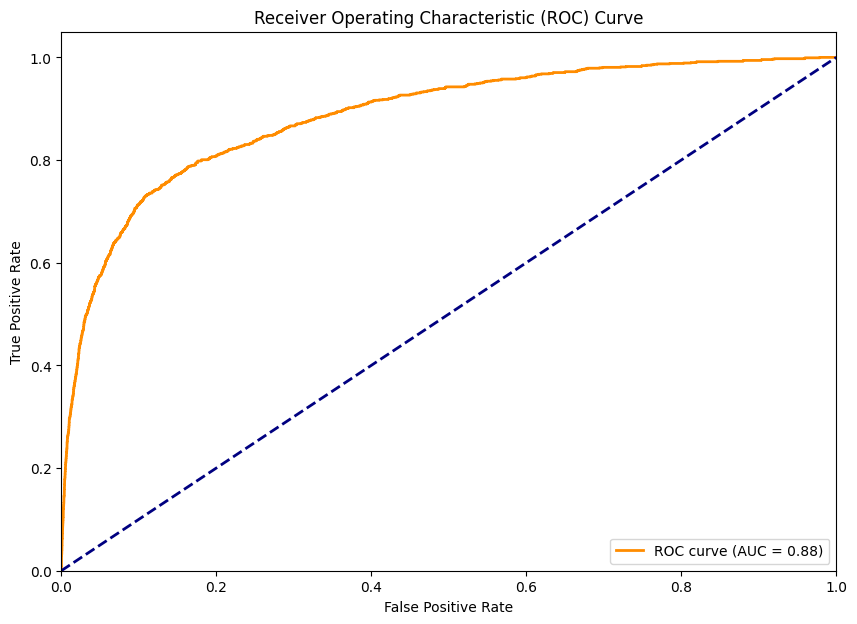

In [176]:
# ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, prediction_ensemble)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

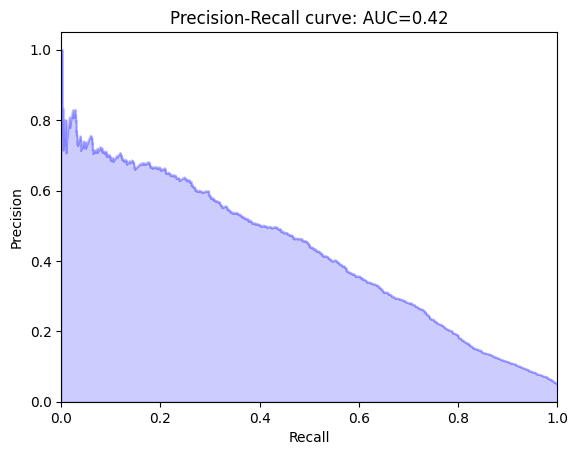

In [177]:
# Get predicted probabilities for the positive class (class 1)
# Calculate PR AUC
pr_auc = average_precision_score(y_test, prediction_ensemble)

# Plot Precision-Recall curve (optional)
precision, recall, _ = precision_recall_curve(y_test, prediction_ensemble)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()


### Ensemble Model 4 (baseline): Average 
This is a baseline model, using just the average result of the 2. Result is not even better than original 2 models 

In [178]:
# ensemble method baseline 
threshold = 0.5  # Adjust this threshold based on your needs

# Predictions from XGBoost model (assuming it returns class probabilities)
xgboost_predictions = best_xgboost.predict_proba(normalised_X_test)[:,1] 

# Predictions from LSTM model (assuming it returns class probabilities)
lstm_predictions = best_lstm.predict(normalised_X_test).ravel() 

# Initialize an empty array to store the final ensemble predictions
final_predictions = []

# Combine predictions based on the rule
for xgboost_prob, lstm_prob in zip(xgboost_predictions, lstm_predictions):
    final_predictions.append((xgboost_prob+lstm_prob)/2)
    
# Convert the final_predictions list to a numpy array if needed
final_predictions = np.array(final_predictions)


745/745 [==============================] - 6s 8ms/step


In [179]:
y_pred = []
for result in final_predictions:
    if result > 0.5: y_pred.append(1)
    else: y_pred.append(0)

In [180]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22648
           1       0.48      0.46      0.47      1184

    accuracy                           0.95     23832
   macro avg       0.73      0.72      0.72     23832
weighted avg       0.95      0.95      0.95     23832



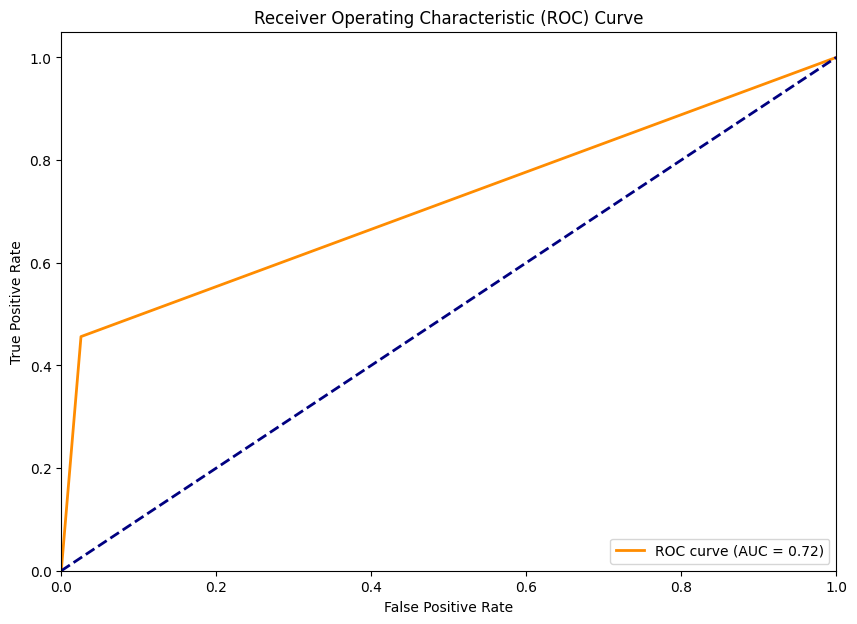

In [181]:
# ROC AUC 
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

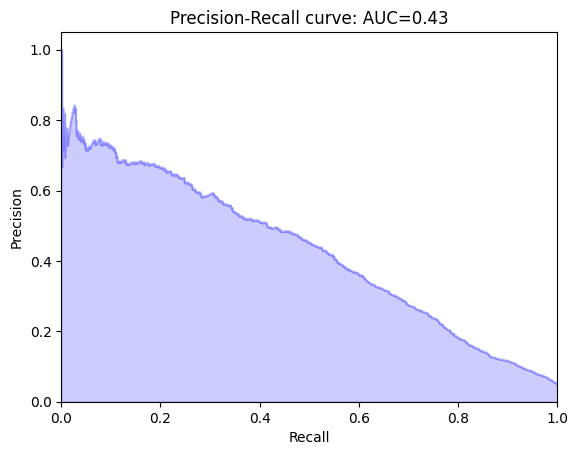

In [182]:
# Get predicted probabilities for the positive class (class 1)
from sklearn.metrics import average_precision_score, precision_recall_curve
# Calculate PR AUC
pr_auc = average_precision_score(y_test, final_predictions)

# Plot Precision-Recall curve (optional)
precision, recall, _ = precision_recall_curve(y_test, final_predictions)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AUC={0:0.2f}'.format(pr_auc))
plt.show()


### Save the best ensemble model (method 3, weighted ensemble using mae)

In [183]:
import joblib
joblib.dump(best_xgboost, 'best_xgboost.pkl')
joblib.dump(best_lstm, 'best_lstm.pkl')
ensemble_weights = {'weight_xgb': weight_xgb, 'weight_lstm': weight_lstm}
joblib.dump(ensemble_weights, 'ensemble_weights.pkl')

['ensemble_weights.pkl']